# DT on the clean Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Statistical analysis

In [4]:
df = pd.read_csv('K_clean_data.csv')
df

,Location,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,...,Badoo,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
0,0,2,0,2,0,0,2,3,3,3,...,0,0,0,0,0,0,1,1,0,1
1,0,2,1,1,0,2,1,3,1,2,...,0,2,1,1,0,0,0,0,1,1
2,0,2,1,1,0,0,1,2,1,3,...,0,1,1,0,0,0,1,1,1,0
3,2,2,1,1,2,2,1,3,4,1,...,0,1,0,0,0,0,1,0,0,1
4,0,2,0,2,2,2,2,2,3,5,...,0,2,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,2,1,1,2,2,2,3,2,3,...,0,3,1,0,0,0,0,0,0,1
408,2,2,0,2,2,2,3,3,4,4,...,0,0,0,0,0,1,1,0,0,1
409,0,2,0,2,2,2,1,4,3,1,...,0,1,0,1,0,0,0,0,1,1
410,0,2,0,3,0,0,3,4,2,2,...,0,0,0,0,0,1,1,0,0,0


In [5]:
df.describe()

,Location,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,...,Badoo,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,0.439320,1.849515,0.509709,1.565534,1.218447,1.233010,2.014563,2.888350,2.516990,2.424757,...,0.024272,1.194175,0.402913,0.402913,0.065534,0.218447,0.334951,0.415049,0.305825,0.631068
std,1.000587,0.636807,0.500514,0.590333,0.967023,0.971155,0.834057,1.211125,1.192924,1.322340,...,0.154079,1.298011,0.491080,0.491080,0.247767,0.413694,0.472547,0.493329,0.461316,0.483102
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,3.000000,...,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,5.000000,1.000000,3.000000,2.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Desicion Tree

In [7]:
X = df.drop('Kukumbo?',axis=1)
y = pd.DataFrame(df['Kukumbo?'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
train_acc = list()
test_acc = list()
ds = range(1,3)
for d in ds:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

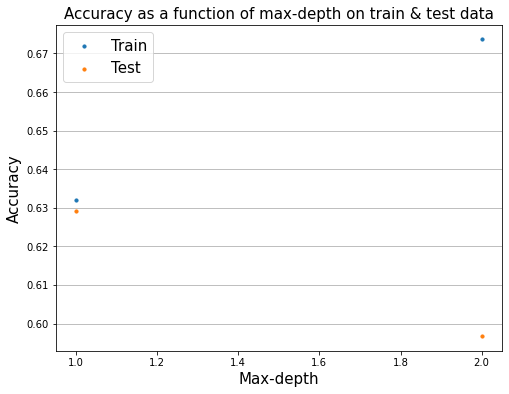

In [9]:
plt.scatter(ds,train_acc, s=10,label='Train')
plt.scatter(ds,test_acc, s=10,label='Test')
plt.xlabel('Max-depth',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy as a function of max-depth on train & test data',fontsize=15)
plt.legend(fontsize=15)
plt.grid(axis='y')
plt.show()

In [24]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

<ipython-input-24-36bddab31ff9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


62.1